In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import acquire
import prepare
import encode
import explore
import features

# Feature engineering

In [28]:
#bring in the data
telco = acquire.get_telco_data()

#prepare our data for exploration and modeling
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

In [3]:
train, test, validate = encode.encoded_df(train, test, validate)

# Min Max Scaler

In [4]:
cols = ["contract_type_encoded","senior_citizen", "tenure", "monthly_charges", "phone_lines", "dependent_partner_grouping"]

In [5]:
train_df = train[cols]

In [6]:
test_df = test[cols]

In [7]:
validate_df = validate[cols]

In [8]:
# train_df

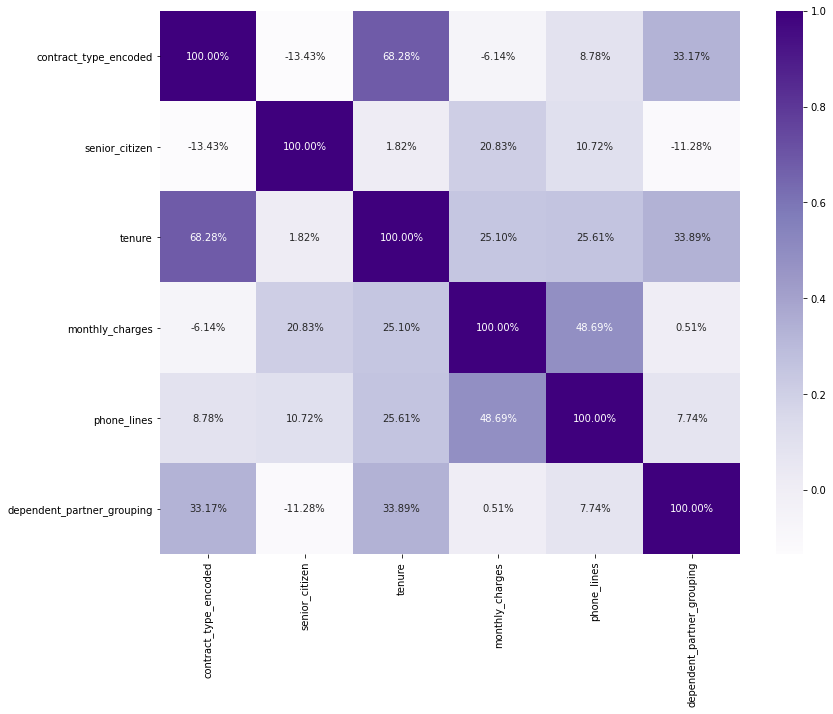

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.corr(),annot=True, cmap="Purples", fmt='.2%')

In [10]:
# scaler = MinMaxScaler()
# scaler.fit(train_df)

In [11]:
# train_scaled = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns.values).set_index([train_df.index.values])

In [12]:
# train_scaled

In [13]:
# test_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns.values).set_index([test_df.index.values])

In [14]:
# validate_scaled = pd.DataFrame(scaler.transform(validate_df), columns= validate_df.columns.values).set_index([validate_df.index.values])

In [15]:
def scaled_data_for_model(train, test, validate, cols):

    train_df = train[cols]
    test_df = test[cols]
    validate_df = validate[cols]
    scaler = MinMaxScaler()
    scaler.fit(train_df)
    train_scaled = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns.values).set_index([train_df.index.values])
    test_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns.values).set_index([test_df.index.values])
    validate_scaled = pd.DataFrame(scaler.transform(validate_df), columns= validate_df.columns.values).set_index([validate_df.index.values])
    return train_scaled, test_scaled, validate_scaled

# Modeling

Because we are trying to predict the customers that will churn, our positive variable will be churn or in our case 1.

**Possible Outcomes:**

TP: Predict that a customer will churn and they do

TN: Predict that a customer will not churn and they do not

FP: Predict that a customer will churn but they do not

FN: Predict that a customer will not churn but they do

**In our Case:**
Since we are trying to identify customers that will churn we want to minimize our FN but we also do not want to assume all customers will churn so we will start with overall accuracy scores, followed by recall scores to select our top model

## Baseline Model
Our baseline is going to be predicting all customers will not churn because that is the most common value. The baseline will help us evaluate how our models are doing compared to assuming all customers will stay and not churn

- We are going to create a variable that stores the mean of the average monthly charge so we can find out how much we are loosing per month with our predictions

In [16]:
# dataframe for our y_train
y_train = train.churn_encoded

In [17]:
#variable for mean average
avg_monthly_charge = train.monthly_charges.mean()
avg_monthly_charge

64.79177945418236

In [18]:
#I'm going to create a new dataframe to hold all our predicted values from all our models
evaluations = pd.DataFrame({"actual": y_train})

In [19]:
evaluations["baseline"] = 0

In [20]:
matrix = pd.crosstab(evaluations.actual, evaluations.baseline)
matrix

baseline,0
actual,
0,3304
1,1203


In [21]:
#calcualte accuracy for baseline
baseline_accuracy = (evaluations.baseline == evaluations.actual).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')


baseline accuracy: 73.31%


In [22]:
basline_loss = 1203 * avg_monthly_charge

In [23]:
print(f"Our baseline model is costing us roughly ${basline_loss:2,.2f} a month, which is what we are currently loosing since we do not have a model in place.")

Our baseline model is costing us roughly $77,944.51 a month, which is what we are currently loosing since we do not have a model in place.


## Logistic Regression

In [24]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4507 entries, 1249 to 6958
Data columns (total 32 columns):
customer_id                      4507 non-null object
gender                           4507 non-null object
senior_citizen                   4507 non-null int64
partner                          4507 non-null object
dependents                       4507 non-null object
tenure                           4507 non-null int64
online_security                  4507 non-null object
online_backup                    4507 non-null object
device_protection                4507 non-null object
tech_support                     4507 non-null object
streaming_tv                     4507 non-null object
streaming_movies                 4507 non-null object
paperless_billing                4507 non-null object
monthly_charges                  4507 non-null float64
total_charges                    4507 non-null float64
churn                            4507 non-null object
contract_type             

In [25]:
cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"] 

In [26]:
X_train = train[cols]
X_validate = validate[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

KeyError: "['encoded_internet_service_type'] not in index"

In [ ]:
def logistic_regression_model(X_train, y_train):
    '''
    Function used to create and fit logistic regression models. 
    Returns model and predictions and probabiliteis.
    '''
    logit = LogisticRegression().fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    y_predict_proba = logit.predict_proba(X_train)
    return logit, y_pred, y_predict_proba

In [ ]:
logit, y_pred, y_predict_prob = logistic_regression_model(X_train, y_train)
evaluations["logistic_regression_1"] = y_pred

In [ ]:
logistic_regression_1_accuracy = logit.score(X_train, y_train)

In [ ]:
evaluations

In [ ]:
print(f'Accuracy of Logistic Regression classifier on training set: {logistic_regression_1_accuracy:.2f}')

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.logistic_regression_1)
matrix

In [ ]:
logistic_regression_1_loss = 552 * avg_monthly_charge

In [ ]:
logistic_regression_1_earned = 651 * avg_monthly_charge

In [ ]:
logistic_regression_1_earned

In [ ]:
if logistic_regression_1_accuracy > baseline_accuracy:
    print("The Logistic Regression model is performing better than the baseline")
else:
    print("The baseline model is performing best")

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
coef = logit.coef_[0]
# We want to check that the coef array has the same number of items as there are features in our X_train dataframe.
assert(len(coef) == X_train.shape[1])
coef = logit.coef_[0]
columns = X_train.columns
df = pd.DataFrame({"feature": columns,
                   "feature_importance": coef,
                  })

df = df.sort_values(by="feature_importance", ascending=False)
sns.barplot(data=df, x="feature_importance", y="feature", palette="Purples_r")
plt.title("What are the most influencial features?")

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

cols = ["senior_citizen", "monthly_charges"]

In [ ]:
X_train = train[cols]
X_validate = validate[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

In [ ]:
logit, y_pred, y_predict_prob = logistic_regression_model(X_train, y_train)
evaluations["logistic_regression_security_contract"] = y_pred

In [ ]:
logit.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_pred))

## Decision Tree Classifier

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

In [ ]:
cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

In [ ]:
def decision_tree_classifier_model(X_train, y_train, max_depth):
    '''
    Function used to create and fit decision tree models. It requires a max_depth parameter. Returns model and predictions.
    '''
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    return clf, y_pred

In [ ]:
#to avoid overfitting loop through different max depths and compare accuarcy from X_training to X_validate
for n in range(1,26):
    clf, y_pred = decision_tree_classifier_model(X_train, y_train, n)
    print(f'max_depth = {n}, train_accuracy = {clf.score(X_train, y_train):.2%}, difference in accuracy = {(clf.score(X_train, y_train) - clf.score(X_validate, y_validate))/clf.score(X_validate, y_validate):.0%}')

We will go with a max depth of 6 since there is no difference in between our validate and training data

In [ ]:
clf, y_pred = decision_tree_clossifier_model(X_train, y_train, 6)
evaluations["decision_tree_model_1"] = y_pred

In [ ]:
decision_tree_model_accuracy = clf.score(X_train, y_train)

In [ ]:
print(f'Accuracy of Decision Tree Classifier on training set: {decision_tree_model_accuracy:.2f}')

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.decision_tree_model_1)
matrix

In [ ]:
decision_tree_model_loss = 546 * avg_monthly_charge

In [ ]:
if decision_tree_model_accuracy > logistic_regression_1_accuracy:
    print("Our Decision Tree Classifier model is performing better than the Logistic Regression model")
else:
    print("Logistic Regression is performing the best")

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
coef = clf.feature_importances_
assert(len(coef) == X_train.shape[1])
coef = clf.feature_importances_
columns = X_train.columns
df = pd.DataFrame({"feature": columns,
                   "feature_importance": coef,
                  })


df = df.sort_values(by="feature_importance", ascending=False)
sns.barplot(data=df, x="feature_importance", y="feature", palette="Purples_r")
plt.title("What are the most influencial features?")

**Takeaways:**
Overall this model is performing best but could use improvement.

## Random Forest

In [ ]:

#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

In [ ]:
cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

In [ ]:
def random_forest_model(X_train, y_train, leaf, max_depth):
    ''' 
    Function used to create and fit random forest models. Requires to specify leaf and max_depth. Returns model and predictions.
    '''
    rf = RandomForestClassifier(random_state= 123, min_samples_leaf = leaf, max_depth = max_depth).fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    return rf, y_pred

In [ ]:
for n in range(1,26):
    rf, y_pred = random_forest_model(X_train, y_train, 1, n)
    print(f'max_depth = {n}, train_accuracy = {rf.score(X_train, y_train):.2%}, difference in accuracy = {(rf.score(X_train, y_train) - rf.score(X_validate, y_validate))/rf.score(X_validate, y_validate):.0%}')

We will go with a max_depth of 7 since it performed the same as our Validate data and the accuracy score is higher than 6

In [ ]:
rf, y_pred = random_forest_model(X_train, y_train, 1, 7)
evaluations["random_forest_model_1"] = y_pred

In [ ]:
random_forest_accuracy = rf.score(X_train, y_train)
random_forest_accuracy

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.random_forest_model_1)
matrix

In [ ]:
if random_forest_accuracy > decision_tree_model_accuracy:
    print("Our Random Forest model is performing better than the Decision tree model")
else:
    print("Logistic Regression is performing the best")

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
coef = rf.feature_importances_
assert(len(coef) == X_train.shape[1])
coef = rf.feature_importances_
columns = X_train.columns
df = pd.DataFrame({"feature": columns,
                   "feature_importance": coef,
                  })


df = df.sort_values(by="feature_importance", ascending=False)
sns.barplot(data=df, x="feature_importance", y="feature", palette="Purples_r")
plt.title("What are the most influencial features?")

## KNN

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

In [ ]:
cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

In [ ]:
def knn_model(X_train, y_train, n_neighbors):
    '''
    Function used to create and fit KNN model. Requires to specify n_neighbors. Returns model and predictions.
    '''
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    return knn, y_pred

In [ ]:
for n in range(1,26):
    knn, y_pred = knn_model(X_train, y_train, n)
    print(f'max_depth = {n}, train_accuracy = {knn.score(X_train, y_train):.2%}, difference in accuracy = {(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))/knn.score(X_validate, y_validate):.0%}')

In [ ]:
knn, y_pred = knn_model(X_train, y_train, 12)
evaluations["knn_model_1"] = y_pred

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.knn_model_1)
matrix

In [ ]:
knn_accuracy = knn.score(X_train, y_train)

In [ ]:
if  knn_accuracy > random_forest_accuracy:
    print("Our KNN model is performing better than the Random Forest model")
else:
    print("Random Forest model is performing the best")

In [ ]:
print(classification_report(y_train, y_pred))

Takeaways from modeling:
* Our best performing model for accuracy is the Random Forest which has a score of approximately 81%
* If this model was deployed we could expect to earn $42k if we are able to keep all the customers we predict are going to churn

# To do next
- Try all models with scaled data
- test best model

# Scale Data

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
X_test = test[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

# Scale the dataframes
X_train_scaled, X_test_scaled, X_validate_scaled = scaled_data_for_model(X_train, X_test, X_validate, cols)

# Modeling with all features Scaled

## Logistic Regression

In [ ]:
logit, y_pred_lr_scaled, y_predict_prob_lr_scaled = logistic_regression_model(X_train_scaled, y_train)
evaluations["logistic_regression_scaled"] = y_pred

In [ ]:
logistic_regression_scaled_accuracy = logit.score(X_train_scaled, y_train)
logistic_regression_scaled_accuracy

In [ ]:
evaluations.head()

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.logistic_regression_1)
matrix

In [ ]:
print(classification_report(evaluations.actual, evaluations.logistic_regression_scaled))

In [ ]:
coef = logit.coef_[0]
# We want to check that the coef array has the same number of items as there are features in our X_train_scaled dataframe.
assert(len(coef) == X_train_scaled.shape[1])
coef = logit.coef_[0]
columns = X_train.columns
df = pd.DataFrame({"feature": columns,
                   "feature_importance": coef,
                  })

df = df.sort_values(by="feature_importance", ascending=False)
sns.barplot(data=df, x="feature_importance", y="feature", palette="Purples_r")
plt.title("What are the most influencial features?")

## Decision Tree

In [ ]:
def scaled_data_for_model(train, test, validate, cols):

    train_df = train[cols]
    test_df = test[cols]
    validate_df = validate[cols]
    scaler = MinMaxScaler()
    scaler.fit(train_df)
    train_scaled = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns.values).set_index([train_df.index.values])
    test_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns.values).set_index([test_df.index.values])
    validate_scaled = pd.DataFrame(scaler.transform(validate_df), columns= validate_df.columns.values).set_index([validate_df.index.values])
    return train_scaled, test_scaled, validate_scaled

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
X_test = test[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

# Scale the dataframes
X_train_scaled, X_test_scaled, X_validate_scaled = scaled_data_for_model(X_train, X_test, X_validate, cols)

In [ ]:
#to avoid overfitting loop through different max depths and compare accuarcy from X_training to X_validate
for n in range(1,26):
    clf, y_pred = decision_tree_classifier_model(X_train_scaled, y_train, n)
    print(f'max_depth = {n}, train_accuracy = {clf.score(X_train_scaled, y_train):.2%}, difference in accuracy = {(clf.score(X_train_scaled, y_train) - clf.score(X_validate_scaled, y_validate))/clf.score(X_validate_scaled, y_validate):.0%}')

In [ ]:
clf_scaled, y_pred = decision_tree_clossifier_model(X_train, y_train, 6)
evaluations["decision_tree_model_scaled"] = y_pred

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.decision_tree_model_scaled)
matrix

In [ ]:
print(classification_report(evaluations.actual, evaluations.decision_tree_model_scaled))

In [ ]:
coef = clf_scaled.feature_importances_
assert(len(coef) == X_train.shape[1])
coef = clf_scaled.feature_importances_
columns = X_train.columns
df = pd.DataFrame({"feature": columns,
                   "feature_importance": coef,
                  })


df = df.sort_values(by="feature_importance", ascending=False)
sns.barplot(data=df, x="feature_importance", y="feature", palette="Purples_r")
plt.title("What are the most influencial features?")

## Random Forest

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
X_test = test[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

# Scale the dataframes
X_train, X_test, X_validate = scaled_data_for_model(X_train, X_test, X_validate, cols)

In [ ]:
for n in range(1,26):
    rf, y_pred = random_forest_model(X_train, y_train, 1, n)
    print(f'max_depth = {n}, train_accuracy = {rf.score(X_train, y_train):.2%}, difference in accuracy = {(rf.score(X_train, y_train) - rf.score(X_validate, y_validate))/rf.score(X_validate, y_validate):.0%}')

In [ ]:
rf, y_pred = random_forest_model(X_train_scaled, y_train, 1, 7)
evaluations["random_forest_model_scaled"] = y_pred

In [ ]:
scaled_random_forest_accuracy = rf.score(X_train_scaled, y_train)
scaled_random_forest_accuracy

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.random_forest_model_scaled)
matrix

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
coef = rf.feature_importances_
assert(len(coef) == X_train.shape[1])
coef = rf.feature_importances_
columns = X_train.columns
df = pd.DataFrame({"feature": columns,
                   "feature_importance": coef,
                  })


df = df.sort_values(by="feature_importance", ascending=False)
sns.barplot(data=df, x="feature_importance", y="feature", palette="Purples_r")
plt.title("What are the most influencial features?")

## KNN

In [ ]:
#bring the data in fresh
telco = acquire.get_telco_data()

#split and prep
train, test, validate = prepare.prep_telco(telco, train_size=.8, seed=123)

#encode data
train, test, validate = encode.encoded_df(train, test, validate)

cols = ["senior_citizen", "tenure", "online_security", "monthly_charges", "total_charges", "tenure_years", "phone_lines", "partner_encoded", "dependents_encoded", "contract_type_encoded", "encoded_internet_service_type", "payment_type_encoded", "tech_support_encoded"]
X_train = train[cols]
X_validate = validate[cols]
X_test = test[cols]
y_train = train.churn_encoded
y_validate = validate.churn_encoded

# Scale the dataframes
X_train, X_test, X_validate = scaled_data_for_model(X_train, X_test, X_validate, cols)

In [ ]:
for n in range(1,26):
    knn, y_pred = knn_model(X_train, y_train, n)
    print(f'max_depth = {n}, train_accuracy = {knn.score(X_train, y_train):.2%}, difference in accuracy = {(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))/knn.score(X_validate, y_validate):.0%}')

In [ ]:
knn, y_pred = knn_model(X_train, y_train, 12)
evaluations["knn_model_model"] = y_pred

In [ ]:
matrix = pd.crosstab(evaluations.actual, evaluations.knn_model_model)
matrix

In [ ]:
scaled_knn_accuracy = knn.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_pred))